## Dimensionality Reduction

### Load the necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.decomposition import PCA, NMF

### Getting data


Recall that for dimensionality reduction we form the matrix

$$
{\bf X} = [{\bf x}_1; {\bf x}_2; \ldots; {\bf x}_n] \in \mathbb{R}^{d\times n}
$$

where ${\bf x}_i \in \mathbb{R}^d$ is the space of the data and $n$ is the number of training points.  We want to find a **dictionary** matrix ${\bf W}$ and a **code** matrix ${\bf Z}$ such that ${\bf X} \approx {\bf WZ}$.  Dimensionality reduction comes in when we select ${\bf W} \in \mathbb{R}^{d \times p}$ and ${\bf Z} \in \mathbb{R}^{p\times n}$ with $p \ll d$.

In [2]:
# Load in the data.
newsgroups_train = datasets.fetch_20newsgroups(subset='train', 
                                               categories=['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian'])

tfidf_vectorizer = TfidfVectorizer(min_df = 30)

# The data matrix X and the targets y.
X = (tfidf_vectorizer.fit_transform(newsgroups_train.data).T).todense()
y = newsgroups_train.target

(d, n) = X.shape
print("X has shape (d, n) = ", X.shape)



X has shape (d, n) =  (1771, 2369)


## 1: Principal Component Analysis

Recall that for dimensionality reduction we form the matrix

$$
{\bf X} = [{\bf x}_1; {\bf x}_2; \ldots; {\bf x}_n] \in \mathbb{R}^{d\times n}
$$

where ${\bf x}_i \in \mathbb{R}^d$ is the space of the data and $n$ is the number of training points.  We want to find a **dictionary** matrix ${\bf W}$ and a **code** matrix ${\bf Z}$ such that ${\bf X} \approx {\bf WZ}$.  Dimensionality reduction comes in when we select ${\bf W} \in \mathbb{R}^{d \times p}$ and ${\bf Z} \in \mathbb{R}^{p\times n}$ with $p \ll d$.

The dimensions of the data loaded above is reduced from `d=1771` to `p=5`.

In [3]:
# The reduced dimension.
p = 5

### 1.a: Computing the dictionary and code matrices

In [29]:
## Your code goes here
pca = PCA(n_components=p)
pca.fit(np.transpose(X))

W = np.transpose(pca.components_)
Z = np.transpose(pca.transform(np.transpose(X)))
#Z = np.transpose((X.T - pca.mean_).dot(pca.components_.T))

print("W has shape ", W.shape)
print("Z has shape ", Z.shape)

W has shape  (1771, 5)
Z has shape  (5, 2369)


check the results:

In [30]:
# Also print out the first p components.  There is nothing to do for this part.
loadings = W.T
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])
q = len(loadings)
for i in range(q):
    insens_idx = np.argsort(loadings[i])

    print ('COMPONENT ' + str(i + 1))
    print (' '.join([invocab[w_ix] for w_ix in insens_idx[-10:]]) + '\n')

COMPONENT 1
not we in god is and to that of the

COMPONENT 2
n3jxp chastity shameful cadre dsl cs gordon banks geb pitt

COMPONENT 3
not hell christians faith that his jesus he we god

COMPONENT 4
uga georgia apple ai god university of mac edu the

COMPONENT 5
michael god dod sun in he of was the com



### 1.b: Plotting the reduced data

<Figure size 864x576 with 0 Axes>

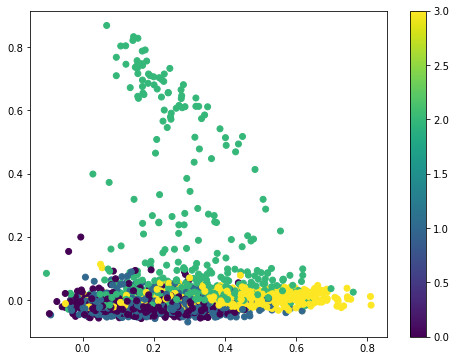

In [37]:
plt.figure(figsize=(12, 8))
## Your code starts here
top_vectors = W[:, :2]
X_reduced = X.transpose() @ top_vectors
X_reduced = np.array(X_reduced)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:,0], X_reduced[:, 1], c = y)

## Your code ends here
plt.colorbar();

### 1.c: Explain the variance

Recall that for PCA the dictionary and code matrices ${\bf W},{\bf Z}$ can be found using either an eigenvalue decomposition or the SVD.  Suppose the matrix ${\bf X}$ is centered so that 
$$
\frac{1}{n}\sum_{i = 1}^n {\bf x}_i = \vec{0} \in \mathbb{R}^d
$$
The covariance matrix is defined to be ${\bf C} = {\bf XX}^T$.  The eigen-decomposition of ${\bf C} = {\bf W\Sigma W}^T$ gives the matrices ${\bf W}$ and ${\bf Z} = {\bf \Sigma W}^T$.  Here

$$
{\bf \Sigma} = \begin{bmatrix}
\sigma_1^2 & & \\
 & \ddots & \\
 & & \sigma_d^2
\end{bmatrix}
$$

is the diagonal matrix with eigenvalues $\sigma_i^2$.  The proportion of explained variance by our low-dimensional projection is defined to be

$$
\mathrm{PV}(p) := \frac{\sum_{i=1}^p \sigma_i^2}{\sum_{i=1}^d \sigma_i^2}
$$

100%|█████████████████████████████████████████| 1000/1000 [13:10<00:00,  1.27it/s]


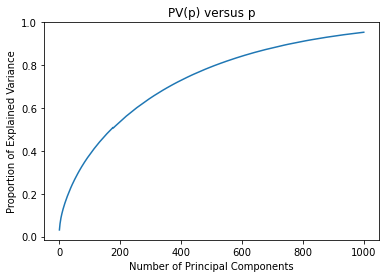

In [47]:
## Your code goes here 
from tqdm import tqdm

p_list = np.arange(1, 1001,1)
PV_list = np.array([])
for i in tqdm(p_list):
    pca = PCA(n_components=i)
    pca.fit(np.transpose(X))
    explained_variance_ratio = pca.explained_variance_ratio_
    PV = np.sum(explained_variance_ratio)
    PV_list = np.append(PV_list,PV)
plt.title("PV(p) versus p")
plt.xlabel("Number of Principal Components")
plt.ylabel("Proportion of Explained Variance")
plt.plot(p_list,PV_list)

## Question P2. Non-Negative Matrix Factorization (NMF) (30 Points Total)

### Question P2.a: Computing the dictionary and code matrices (10 Points)

Using the NMF implemented in Sci-Kit learn to obtain the low-dimensional projection of ${\bf X}$ (i.e. get ${\bf W}$ and ${\bf Z}$) for when $p = 5$.

In [54]:
## Your code goes here
import warnings
warnings.filterwarnings('ignore')

model = NMF(n_components=p)
model.fit(np.transpose(X))

W = np.transpose(model.components_)
Z = np.transpose(model.transform(np.transpose(X)))

print("W has shape ", W.shape)
print("Z has shape ", Z.shape)

W has shape  (1771, 5)
Z has shape  (5, 2369)


### Question P2.b: Compute the reconstruction error (20 Points)

Define the reconstruction error

$$
R(p) := \frac{1}{2}\|{\bf X} - {\bf WZ}\|_F^2
$$

where

$$
\|M\|_F^2 = \sum_{i = 1}^m \sum_{j = 1}^k M_{ij}^2
$$

is the Frobenius norm of $M \in \mathbb{R}^{m \times k}$.  Make a plot of the reconstuction error $R(p)$ versus $p$, for $p = 5, 10, 15, \ldots, 50$. 

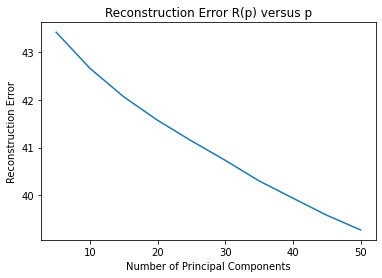

In [53]:
## Your code goes here
p_list = np.arange(5, 55, 5)
RE_list = np.array([])
for i in p_list:
    model = NMF(n_components=i)
    model.fit(np.transpose(X))
    RE = model.reconstruction_err_
    RE_list = np.append(RE_list, RE)
plt.title("Reconstruction Error R(p) versus p")
plt.xlabel("Number of Principal Components")
plt.ylabel("Reconstruction Error")
plt.plot(p_list,RE_list)

## Question P3. K-Means Clustering (45 Points Total)

In this section, we will use K-means algorithm for image segmentation. In particular, we will use the K-means clustering algorithm to segment an image into $K$ distinct colors. 

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import multivariate_normal as normal # Multivariate normal distribution
from scipy.stats import multinomial # Multinomial distribution
import cv2 # OpenCV package for computer vision

### Load the image data 

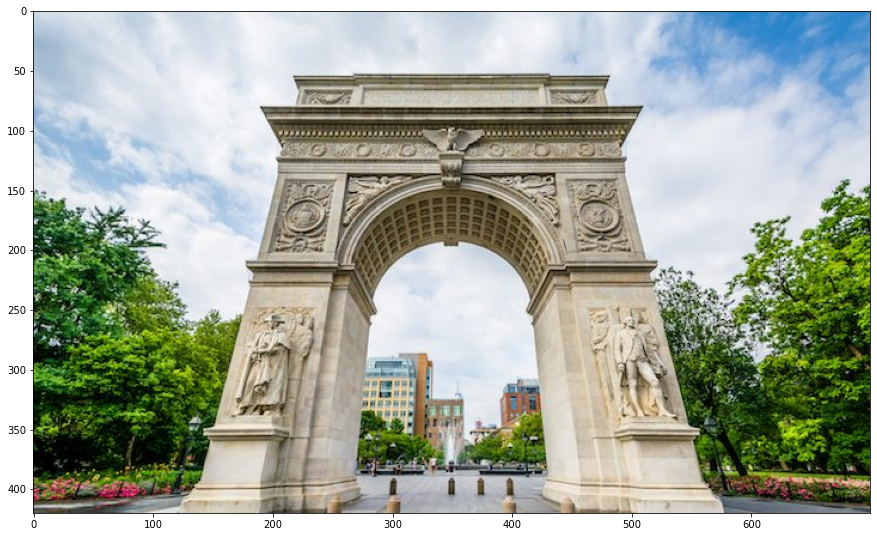

In [60]:
# Load the image and convert it from BGR (used by cv2) to RGB (used by matplotlib).
wsq_image = cv2.cvtColor(cv2.imread("wsq_park.jpg"), cv2.COLOR_BGR2RGB)
plt.figure(figsize = (15,10))
# Show the image.
plt.imshow(wsq_image);

Since each pixel has a red, blue, and green value we can think of each pixel as a vector ${\bf x}_i \in \mathbb{R}^3$ for $i=1,\ldots,N$, where $N$ is the number of pixels in the image.  Let ${\bf X} = [{\bf x}_1,\ldots, {\bf x}_N]^T \in \mathbb{R}^{N \times 3}$ be the dataset which is the collection of all of the pixels.  We will use K-means to cluster the points in the dataset together, which will effectively segment into regions of similar colors.  

In [81]:
# The dataset X of all the pixel RGB values.
X = wsq_image.reshape((wsq_image.shape[0] * wsq_image.shape[1], wsq_image.shape[2]))
print(X.shape)

(294000, 3)


### 3.a: Implementing K-means

Start by implementing the `KMeans` class.  We need to fill in the following methods.

1. `fit`, the main K-means clustering algorithm to determine the cluster centers $\mu_j \in \mathbb{R}^3$ for $j = 1,\ldots,K$.
2. `compute_distances`, a method to compute the squared distances $\|{\bf x}_i - \mu_j\|^2$ for all $i=1,\ldots,N$ and $j = 1,\ldots,K$.
3. `distortion`, a method that computes the distortion $J$ defined by
$$
J = \sum_{i=1}^N \sum_{j=1}^K r_{ij} \|{\bf x}_i - \mu_j\|^2
$$
where
$$
r_{ij} = \begin{cases}
1 & \text{ if } \|{\bf x}_i - \mu_j\|^2 = \mathrm{min}_{l \in \{1,\ldots, K\}} \|{\bf x}_i - \mu_l\|^2\\
0 & \text{ otherwise }
\end{cases}
$$
In other words, $r_{ij}$ is 1 if data point ${\bf x}_i$ is assigned to cluster $j \in \{1,\ldots,K\}$ and 0 otherwise.

In [113]:
class KMeans:
    
    """
    Initialize the K-means model.  Here labels denotes the numpy array of shape (N, ) where each entry at index
    i is an integer in {1,...,K} according to which cluster point x_i is assigned to.
    
    Input:
    K, int -- the number of clusters
    X, numpy.ndarray -- shape (N, d) where N is the number of data points and d is the dimension
    mu_0, numpy.ndarray -- shape (K, d) where K is number of clusters and d is the dimension, 
                           initialization of cluster centers
    """
    def __init__(self, K, X, mu_0):
        assert K == mu_0.shape[0]
        self.K = K
        self.X = X
        self.N = X.shape[0]
        self.mu = mu_0
        self.labels = None
    
    """
    The K-Means clustering algorithm.  Update the array of the means, m, as well as the array of labels
    for each point in the dataset.
    
    Input:
    iters, int -- the number of K-means iterations to perform
    
    Return:
    labels, numpy.ndarray -- numpy array of ints of shape (N, )
                             the cluster assignments (i.e. self.labels after it has been updated)
    """
    def fit(self, iters):
        labels = np.zeros(self.N)
        mu = self.mu
        
        for inter in tqdm(range(iters)):
            dist = self.compute_distances() #(N, K)
            #print(dist.shape)
            labels = np.argmin(dist, axis = 1) #(N, )
            #print(labels)
            for k in range(self.K):
                indices = list(np.where(labels == k))
                #print(indices)
                datapoints_belong_to_kth_cluster = self.X[indices]
                #print(datapoints_belong_to_kth_cluster.shape)
                mu[k] = np.average(datapoints_belong_to_kth_cluster, axis = 0) 
            self.mu = mu
        
        # Ensure that the cluster assignments are integers.
        labels = labels.astype(int)
        self.labels = labels
        self.mu = mu
        return labels
    
    """
    Compute the squared distances from each point in the dataset to each cluster center in the array m.
    
    Return:
    dist, numpy.ndarray -- shape (N, K) of |x_i - mu_j|^2 for i=1,...,N and j=1,...,K
    """
    '''
    def compute_distances(self):
        ## TO DO STARTS HERE ##
        dist = np.zeros(self.N)
        for cluster_center in self.mu: #K iterations
            dists_for_each_cluster = np.array([])
            for datapoint in self.X: #N iterations
                squared_distance = (np.linalg.norm(cluster_center - datapoint)) ** 2
                dists_for_each_cluster = np.append(dists_for_each_cluster, squared_distance)
            dist = np.vstack((dist, dists_for_each_cluster))
        dist = np.transpose(dist[1:,:])
        ## TO DO ENDS HERE ##
        return dist
    '''

    def compute_distances(self):
        dist = np.zeros(self.N)
        for cluster_center in self.mu:
            tmp = self.X - cluster_center
            dists_for_each_cluster = np.apply_along_axis(lambda row: np.linalg.norm(row), 1, tmp)
            dists_for_each_cluster = dists_for_each_cluster ** 2
            dist = np.vstack((dist, dists_for_each_cluster))
        dist = np.transpose(dist[1:,:])
        return dist
    
    
    """
    Compute the distortion J for the current clustering assignment.  Assume that the cluster assignments have
    already been computed after fit is called with at least 1 iteration.
    
    Return:
    J, float -- the distortion
    """
    def distortion(self):
        assert self.labels is not None   
        J = 0.
        for i in range(len(self.X)):
            cluster_num = self.labels[i]
            distortion = (np.linalg.norm(self.X[i] - self.mu[cluster_num])) ** 2
            J += distortion
        return J

### 3.b: Distortion and the Elbow Method 

In this part we will determine the number of clusters to use for image segmentation by plotting the distortion $J$ for different $K$. 

100%|███████████████████████████████████████████████| 15/15 [00:26<00:00,  1.80s/it]


K = 1 finished.


100%|███████████████████████████████████████████████| 15/15 [00:53<00:00,  3.58s/it]


K = 2 finished.


100%|███████████████████████████████████████████████| 15/15 [01:20<00:00,  5.36s/it]


K = 3 finished.


100%|███████████████████████████████████████████████| 15/15 [01:54<00:00,  7.64s/it]


K = 4 finished.


100%|███████████████████████████████████████████████| 15/15 [02:26<00:00,  9.75s/it]


K = 5 finished.


100%|███████████████████████████████████████████████| 15/15 [02:41<00:00, 10.76s/it]


K = 6 finished.


100%|███████████████████████████████████████████████| 15/15 [03:07<00:00, 12.49s/it]


K = 7 finished.


100%|███████████████████████████████████████████████| 15/15 [03:33<00:00, 14.21s/it]


K = 8 finished.


100%|███████████████████████████████████████████████| 15/15 [03:59<00:00, 15.95s/it]


K = 9 finished.


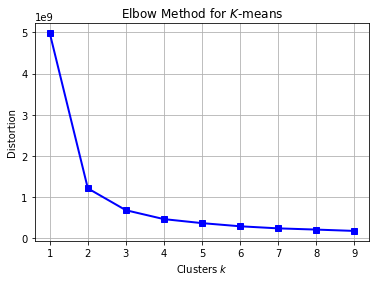

In [114]:
# Load the initial means for K-means.
initial_means = pickle.load(open("kmeans_initial_means.p", "rb"))

K = np.arange(1, 9 + 1, 1) # The array of K values, k = 1,2,...,9.
J = np.zeros(len(K)) # The array of the distortion values for the different k.

# Loop over all k = 1,2,...,9
for k in range(1, len(K) + 1):
    
    # Initialization of the cluster centers.
    mu_0 = initial_means[k - 1]
    
    # Compute the distortion.
    model = KMeans(k, X, mu_0)
    model.fit(15)
    distortion = model.distortion()
    J[k-1] = distortion
    print('K = {:d} finished.'.format(k))

    
# Plot the results.
plt.plot(K, J, 'b-s', lw = 2)
plt.xlabel(r'Clusters $k$')
plt.ylabel(r'Distortion')
plt.title(r'Elbow Method for $K$-means')
plt.grid()
plt.show()

### 3.c: Image Segmentation

Using the $K$ we found in the previous part from the elbow method to cluster the dataset ${\bf X}$.  We will plot the segmented image, which now only uses $K$ distinct colors. 


100%|███████████████████████████████████████████████| 15/15 [01:24<00:00,  5.63s/it]


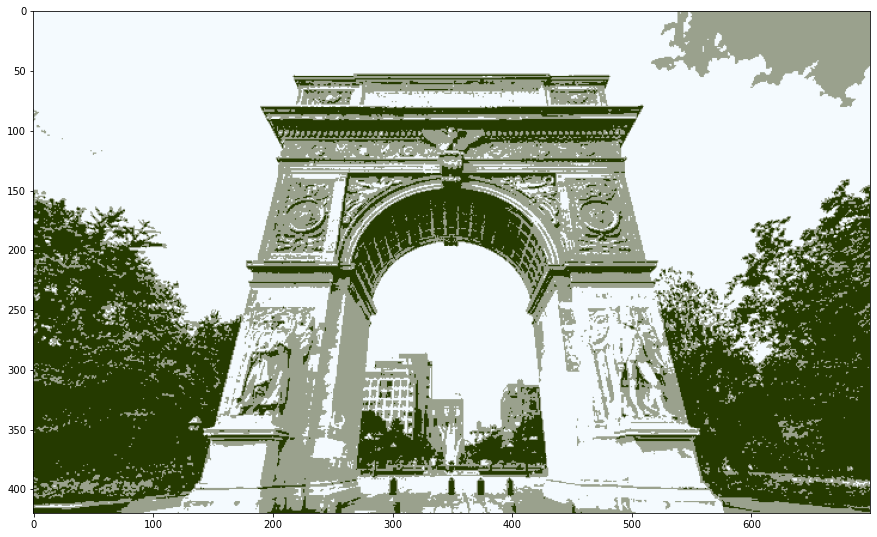

In [121]:
# WE CHOOSE K = 3 BASED ON THE PLOT OF 3.b
mu_0 = initial_means[3 - 1]
model = KMeans(3, X, mu_0)
model.fit(15)
labels = model.labels
mu = model.mu
Y = np.empty((model.N, 3))
for i in range(len(X)):
    cluster_num = labels[i]
    Y[i] = mu[cluster_num]
#round all of the results in  𝐘  to integers between 0 and 255
Y = (255*(Y - np.min(Y))/np.ptp(Y)).astype(int)        

segmented_image = Y.reshape(wsq_image.shape)

plt.figure(figsize = (15, 10))
plt.imshow(segmented_image)
plt.show();